In [1]:
!activate tf2.4

Could not find conda environment: tf2.4
You can list all discoverable environments with `conda info --envs`.



In [2]:
pip install --user ipykernel tf2.4

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tf2.4
ERROR: No matching distribution found for tf2.4


!pip install tensorflow --upgrade
!pip install collections
!pip install nltk
!pip install matplotlib
!pip install wordcloud
!pip install PIL
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en
!pip install sklearn
!pip install keras
!pip install pyspellchecker
!pip install xgboost
!pip3 install textblob
!pip install pyLDAvis
!pip install gensim
!pip install IPython
import nltk
nltk.download('all')
!pip install seaborn
!pip install h5py==2.9

In [3]:

import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

In [4]:


import string
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer=nltk.stem.WordNetLemmatizer()
wordnet.lemmatizer=WordNetLemmatizer()

from nltk.tokenize import word_tokenize

#Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image



#spell checker

from spellchecker import SpellChecker

#Modelling
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.model_selection import KFold,cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

#xgboost
import xgboost as xgb

from tensorflow.python import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import Adam

#to change date to datetime
from datetime import datetime
import time
import re

import string
import scipy.sparse

#Textblob

from textblob import TextBlob

#Gensim

from gensim import corpora,models,similarities,matutils
from gensim.models.ldamulticore import LdaMulticore


import pyLDAvis
import pyLDAvis.gensim_models as gensim

pyLDAvis.enable_notebook()

from gensim.models import CoherenceModel

#to pickle dataframe
import pickle

#show all the columns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',300)


#enable logging for gensim-optional but important
#import logging
#logging.basicConfid(format='%(asctime)s: %(levelname)s : %(message)s',level=logging.ERROR)

from IPython.display import clear_output
clear_output

#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pyLDAvis'

In [5]:
pip install pyLDavis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=47469825179d0420358663c9894e7067abe7301536bf346c24a9862ce2fa9004
  Stored in directory: c:\users\anish\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=bae6b86aee3bedeb93445fab9dc067d0b5ee5094e7e3021231975e48b9d5ffd3
  Stored in directory: c:\users\anish\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anish\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en

#spacy for preprocessing
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
nlp=spacy.load('en_core_web_sm')

In [ ]:
df=pd.read_csv('Reviews.csv')
df.head(2)

# understanding the data

In [ ]:
df.shape

There are 35,267 rows and 4 columns in the dataset

In [ ]:
print(df.columns)

Columns present are Unamed,Ratings, Full/-review and Object

In [ ]:
df.dtypes

2 columns have integer datas and 2 columns have string datas

In [ ]:
df.info()

There are no null values present in the data

# Feature engineering

In [ ]:
#removing unwanted column-unnamed
df.drop('Unnamed: 0', axis =1, inplace = True)

In [ ]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

generate_countplot(df['Ratings'])

The data is unbalanced dataset

In [ ]:
#analysing length of reviews
df['length']=df.Full_review.str.len()
df.head()

The length of the full review with respect to each rating

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.lineplot(x='Ratings', y='length', data=df, ci=None)

Length of reviews is highest for a rating of 4 and lowers for higher or lower than 4

**Data Preprocessing**

In [ ]:
df['Full_review']=df['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
df['Full_review']=df['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
df['Full_review']=df['Full_review'].str.replace(r'£|\$', 'dollers')
df['Full_review']=df['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')
df['Full_review']=df['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')
df['Full_review']=df['Full_review'].str.replace(r'[^\w\d\s]', ' ')
df['Full_review']=df['Full_review'].str.replace(r'\s+', ' ')
df['Full_review']=df['Full_review'].str.replace(r'^\s+|\s+?$', '')

In [ ]:
df

In [ ]:
#remove stopwords
stop=set(stopwords.words('english')+ ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Full_review']=df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatisation
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
     
#adding POS tags with lemmatization
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged=nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #tuple of (token,wordnet_tag)
    wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
    
    lemmatized_sentence=[]
    for word,tag in wordnet_tagged:
        if tag is None:
            #if no available tag,append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatized_sentence)

df['Full_review']=df['Full_review'].apply(lambda x:lemmatize_sentence(x))

In [ ]:
df['Full_review'][:2]

In [ ]:
a=df

In [ ]:
df.to_csv('updated_reviews')

# EDA

In [ ]:
#1.word count

#splitting the words as per spaces 
#length of the string of split based on spaces-will give list of all the terms
df["Review_WC"]=df['Full_review'].apply(lambda x:len(str(x).split(" ")))
print(df[["Review_WC",'Full_review']].head(3))



#Density plot and histogram of all word count
sns.distplot(df['Review_WC'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

In [ ]:
df.head(5)

In [ ]:
#2.Charachter count-COUNT OF EACH LETTER IN A SENTENCE

df['Review_CC']=df['Full_review'].str.len()
print(df[['Review_CC','Full_review']].head(3))

#Density plot and histogram of all charachter count
sns.distplot(df['Review_CC'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

In [ ]:
#3.Average word length

def avg_word(sentence):
    words=sentence.split()
    return(sum(len(word) for word in words)/len(words))

df['Review_AWL']=df['Full_review'].apply(lambda x: avg_word(x))
print(df[['Review_AWL','Full_review']].head(3))


#Density plot and histogram of average word length
sns.distplot(df['Review_AWL'],hist=True,kde=True,
              bins=int(180/5),color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

In [ ]:
df.head(5)

In [ ]:
#4.Frequency distribution of top 30words


#creating 
def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 20 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Full_review']))

In [ ]:
#top 30 rarest words

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)  
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 20 frequent words
    d=words_df.nsmallest(columns='count',n=terms)   #same as frequest other than the nsmallest
    plt.figure(figsize=(20,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Full_review']))

# Feature extraction

In [ ]:
#TF-Term frequency
df_tf=(df['Full_review'][0:1].apply(lambda x: pd.value_counts(x.split(" ")))).sum(axis=0).reset_index()
df_tf.columns=['words','tf']


#IDF-inverse document frequency
for i,word in enumerate(df_tf['words']):
    df_tf.loc[i,'idf']=np.log(df_tf.shape[0]/len(df[df['Full_review'].str.contains(word)]))
    
#tf-idf
df_tf['tfidf']=df_tf['tf']*df_tf['idf']
df_tf[:2]

Converted textual data into numerical form

In [ ]:
#Objects whose reviews are taken
print(df["Object"].nunique())
df['Object'].value_counts().sort_values().plot(kind='barh')

The highest reviews are of smart watch and printers

In [ ]:
sns.countplot(y=df['Object'],hue=df['Ratings'])

the graph shows the ratings of various Objects in Flipkart

# Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords= set(STOPWORDS) 

def show_wordcloud(data, title =None): 
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40,
                          scale=3, random_state=1).generate(str(data))
                                                                                                                                        
    fig= plt.figure(1,figsize=(15,15)) 
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
#creating wordcloud 
print("Word cloud for *Review*:")
print(show_wordcloud(df['Full_review']))
print("\n\n\n")

The most used words in the review is seen to be laptop,product,good,number,window and product. This can be seen with the size of the word cloud

In [ ]:
    print("RATING",1)
    Rating=df['Full_review'][df['Ratings']==1]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
    print("RATING",2)
    Rating=df['Full_review'][df['Ratings']==2]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
    print("RATING",3)
    Rating=df['Full_review'][df['Ratings']==3]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
    print("RATING",4)
    Rating=df['Full_review'][df['Ratings']==4]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
    print("RATING",5)
    Rating=df['Full_review'][df['Ratings']==5]
    spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rating))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
print("Word cloud for *Objects*:")
print(show_wordcloud(df['Object']))
print("\n\n\n")

The most number of objects is laptop

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='y')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='g')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(df[df['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(df[df['Ratings']==5]['length'],bins=20,ax=ax[0],label='Rating 5 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

plt.show()

# HEAT MAP

In [ ]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
df

In [ ]:
df=a

In [ ]:
df.head(2)

In [ ]:
x=df['Full_review']
y=df['Ratings']

# MODELLING

In [ ]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x)
train_word_features=word_vectorizer.transform(x)

In [ ]:
#vectorizing into charachter level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=50000)

char_vectorizer.fit(x)
train_char_features=char_vectorizer.transform(x)

In [ ]:
#clubbing the word and the charachter vector
from scipy.sparse import hstack
train_features=hstack([train_char_features,train_word_features])

Headstack is a library which will horizontally club the word and charachter matrix

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size=0.25, random_state=9)

print(y_train.shape)
print(y_test.shape)

print(x_train.shape)
print(x_test.shape)

In [ ]:
!pip install imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [ ]:
#handling imbalanced data through smote technique

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
x_train_SMOTE, y_train_SMOTE= oversample.fit_resample(x_train, y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_SMOTE)))

In [ ]:
y_train_SMOTE

In [ ]:
vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU ")
        

Default GPU Device: /device:GPU:0
****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.40285811500510377


Cross_Val_Score =  0.6772496416626852


classification_report
               precision    recall  f1-score   support

           1       0.36      0.45      0.40      1217
           2       0.09      0.38      0.14       272
           3       0.15      0.51      0.23       669
           4       0.46      0.43      0.45      1809
           5       0.83      0.37      0.51      4850

    accuracy                           0.40      8817
   macro avg       0.38      0.43      0.35      8817
weighted avg       0.61      0.40      0.45      8817



[[ 551  163  281  127   95]
 [  43  104   64   31   30]
 [  93   80  341   89   66]
 [ 209  246  394  783  177]
 [ 616  611 1183  667 1773]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**********************

C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:07:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


Accu

C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:31:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:53:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Vimal\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross_Val_Score =  0.7019051581151264


classification_report
               precision    recall  f1-score   support

           1       0.46      0.39      0.42      1217
           2       0.30      0.21      0.25       272
           3       0.32      0.33      0.33       669
           4       0.49      0.42      0.46      1809
           5       0.68      0.75      0.71      4850

    accuracy                           0.59      8817
   macro avg       0.45      0.42      0.43      8817
weighted avg       0.57      0.59      0.58      8817



[[ 473   30   63  138  513]
 [  34   57   17   35  129]
 [  67   10  221   67  304]
 [ 127   32  104  764  782]
 [ 320   64  278  545 3

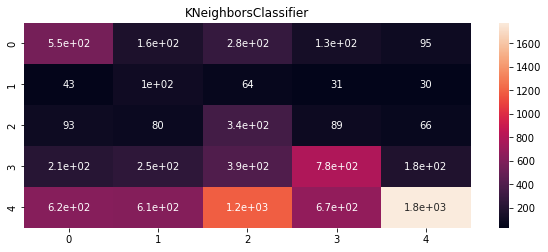

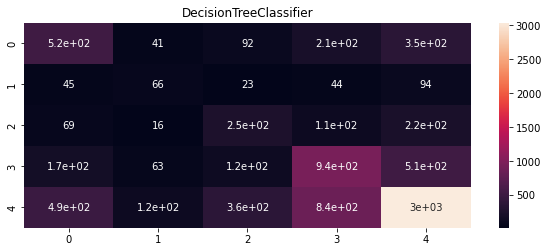

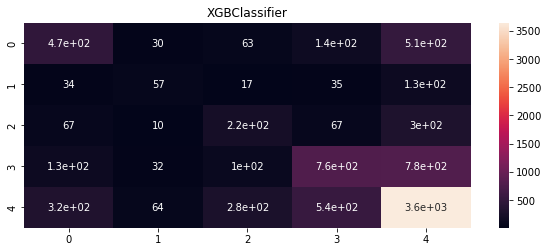

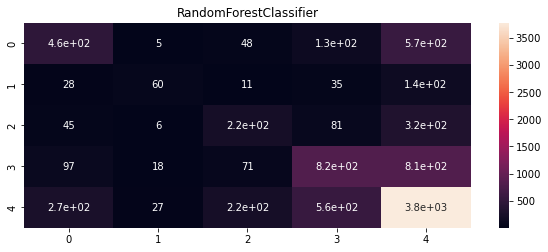

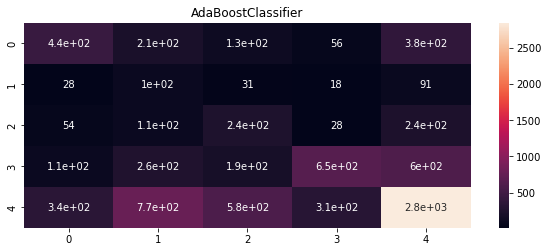

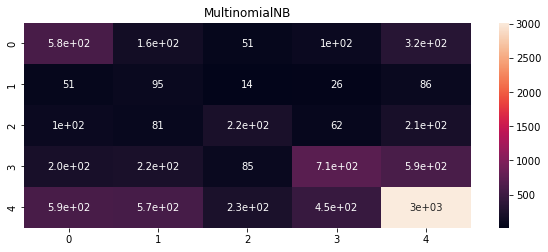

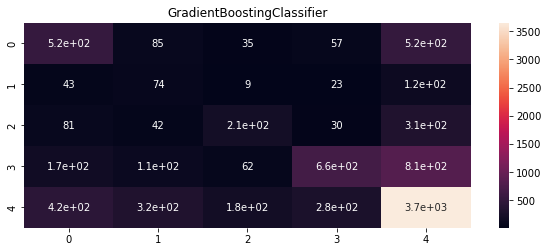

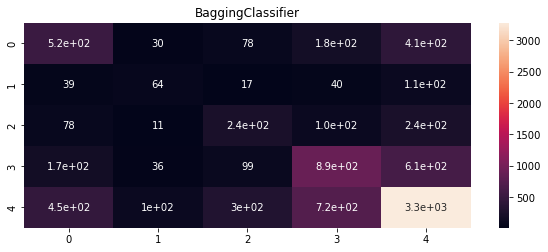

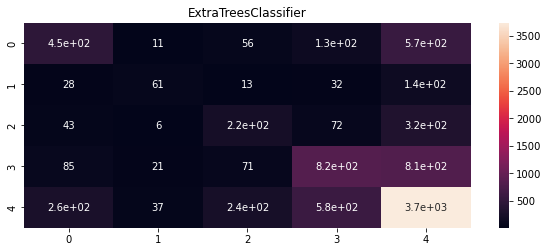

In [69]:

        
Model= []
score= []
cvs=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_SMOTE,y_train_SMOTE)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x_train_SMOTE, y_train_SMOTE, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [78]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,40.285812,67.724964
1,DecisionTreeClassifier,54.599070,69.351449
2,XGBClassifier,58.500624,70.190516
3,RandomForestClassifier,60.508109,78.592616
4,AdaBoostClassifier,48.621980,50.901121
5,MultinomialNB,52.364750,60.769368
6,GradientBoostingClassifier,57.990246,60.203660
7,BaggingClassifier,56.572530,73.185341
8,ExtraTreesClassifier,60.088465,79.370214


# Using gridsearch cv to find the best parameters in GradientBoostingClassifier

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [1, 3], 
            'min_samples_leaf': [1, 3], 
            'min_samples_split': [1, 3, 5],
            'n_estimators': [100,200]}
gbc=GradientBoostingClassifier()

gsv=GridSearchCV(gbc,parameters,cv=5,n_jobs=-1)
gsv.fit(x_train_SMOTE,y_train_SMOTE)
print(gsv.best_params_)

In [ ]:
#RandomForesetClassifier with best parameters

print('GradientBoostingClassifier')
rfc=GradientBoostingClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=1, n_estimators=1000)
rfc.fit(x_train_ns,y_train_ns)
rfc.score(x_train_ns,y_train_ns)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

In [ ]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.csv')

In [ ]:
model=joblib.load('Ratings_prediction.csv')

In [ ]:
#Testing our model
import sys
nums= model.predict(x_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)